In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% ! important; }<style>"))

## 1. Veri Setini UTF-8 Formatında Okuma ve Düzeltme:

In [ ]:
import pandas as pd

# CSV dosyasını UTF-8 formatında içe aktarma
df_demo = pd.read_csv("veri_seti1_demo.csv", encoding="utf-8")
df_alisveris = pd.read_csv("veri_seti2_alisveris.csv", encoding="utf-8")
df_anket = pd.read_csv("veri_seti3_anket.csv", encoding="utf-8")


In [ ]:
# Veri setlerinin ilk birkaç satırını kontrol etme
df_demo

,ID,Ad,Yaş,Gelir,Şehir
0,1,Mehmet,36,7667.50,İstanbul
1,2,Fatma,43,7518.04,NaN
2,3,Hasan,30,8347.80,İstanbul
3,4,Mehmet,46,8954.74,İstanbul
4,5,Ayşe,44,11136.41,Ankara
...,...,...,...,...,...
495,496,Zeynep,49,10745.46,İstanbul
496,497,Ayşe,42,10082.08,İstanbul
497,498,Fatma,29,5815.03,Antalya
498,499,Hasan,38,8289.90,NaN


In [ ]:
df_alisveris

,ID,Kategori,Tutar,Tarih
0,135,Elektronik,61.31,2024-01-25
1,298,Giyim,157.74,2024-04-21
2,405,Gıda,1409.26,2024-09-07
3,453,Gıda,15.52,2024-03-10
4,391,Elektronik,903.35,2024-06-05
...,...,...,...,...
995,124,Gıda,629.29,2024-11-14
996,110,Kitap,282.87,2024-06-22
997,309,Elektronik,271.20,2024-02-27
998,357,Kitap,4.43,2024-05-04


In [ ]:
df_anket

,ID,Memnuniyet,TavsiyeEderim,Kanal
0,209,2.0,Evet,Instagram
1,55,5.0,Evet,Instagram
2,30,5.0,Hayır,Google
3,76,5.0,Hayır,Arkadaş
4,153,4.0,Evet,Google
...,...,...,...,...
338,96,1.0,Hayır,Instagram
339,177,3.0,Evet,Instagram
340,102,3.0,Hayır,Google
341,455,4.0,Hayır,Reklam


In [ ]:
df_demo.info()   # Sütun adları, veri tipleri, null sayıları

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      500 non-null    int64  
 1   Ad      500 non-null    object 
 2   Yaş     500 non-null    int64  
 3   Gelir   460 non-null    float64
 4   Şehir   452 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 19.7+ KB


In [ ]:
df_demo.describe()       # Sayısal sütunlar için özet istatistikler

,ID,Yaş,Gelir
count,500.000000,500.000000,460.00000
mean,250.500000,41.396000,7864.62200
std,144.481833,13.268583,1918.11989
min,1.000000,18.000000,1726.07000
25%,125.750000,31.000000,6484.80000
50%,250.500000,42.000000,7802.17500
75%,375.250000,53.000000,9178.13000
max,500.000000,64.000000,13672.23000


In [ ]:
df_demo.dtypes

,0
ID,int64
Ad,object
Yaş,int64
Gelir,float64
Şehir,object


## Eksik Veri Kontrolü

#### Note: NaN:  Not a Number

In [ ]:
# Tüm sütunlarda NaN değerlerini kontrol eder
bos_kontrol_df_demo = df_demo.isna().any()

print(bos_kontrol_df_demo)

ID       False
Ad       False
Yaş      False
Gelir     True
Şehir     True
dtype: bool


In [ ]:
# Tüm sütunlarda NaN değerlerini kontrol eder
bos_kontrol_df_alisveris  = df_alisveris .isna().any()

print(bos_kontrol_df_alisveris )

ID          False
Kategori    False
Tutar       False
Tarih       False
dtype: bool


In [ ]:
# Tüm sütunlarda NaN değerlerini kontrol eder
bos_kontrol_df_anket = df_anket.isna().any()

print(bos_kontrol_df_anket)

ID               False
Memnuniyet       False
TavsiyeEderim    False
Kanal            False
dtype: bool


### isna() fonksiyonu, Pandas kütüphanesinde kullanılır ve bir DataFrame veya Series'teki NaN (Not a Number) değerlerini tespit eder.
### NaN olan hücreler için True, olmayanlar için False döner

In [ ]:
doluluk_orani_df_demo = df_demo.notna().mean() * 100
doluluk_orani_df_demo

,0
ID,100.0
Ad,100.0
Yaş,100.0
Gelir,92.0
Şehir,90.4


### notna() fonksiyonu, Pandas kütüphanesinde kullanılır ve NaN olmayan (dolu) değerleri tespit eder.
### Yani, her hücrede NaN olmayan veriler için True, NaN olanlar için False döner.

In [ ]:
# Her sütundaki NaN olmayan (dolu) değerlerin sayısını hesaplayalım
doluluk_sayisi_df_demo = df_demo.notna().sum()
doluluk_sayisi_df_demo

,0
ID,500
Ad,500
Yaş,500
Gelir,460
Şehir,452


### Görselleştirme

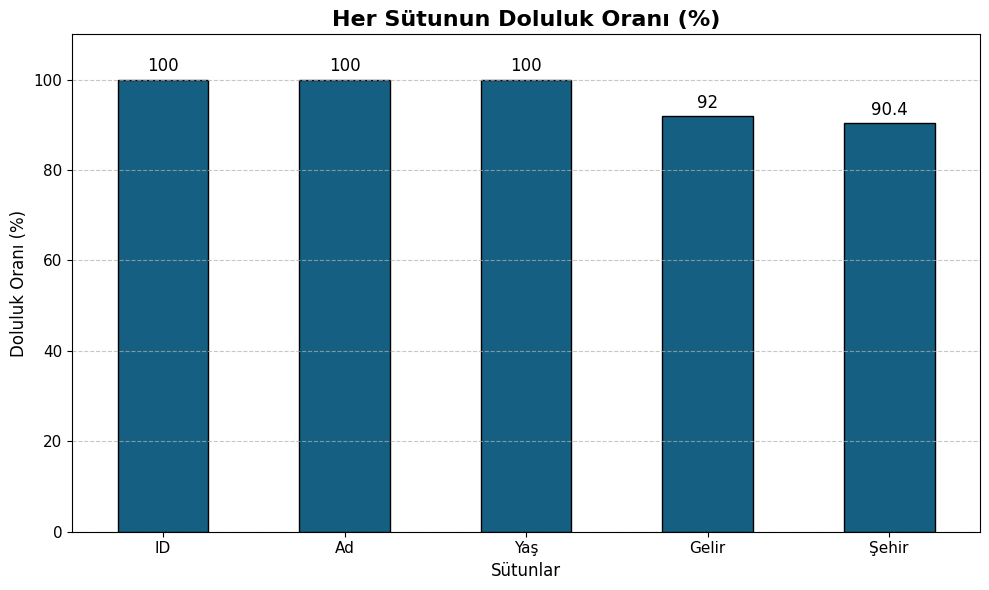

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

ax = doluluk_orani_df_demo.plot(kind='bar', color='#156082', edgecolor='black')

plt.title('Her Sütunun Doluluk Oranı (%)', fontsize=16, fontweight='bold')
plt.ylabel('Doluluk Oranı (%)', fontsize=12)
plt.xlabel('Sütunlar', fontsize=12)

plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=3, fontsize=12)

# Hata burada giderildi
plt.ylim(0, doluluk_orani_df_demo.max() * 1.1)

plt.tight_layout()
plt.show()


## 2. Eksik Verilerin Doldurulması (Veri Temizleme):

In [ ]:
df_demo['Gelir'].mean()

np.float64(7864.622)

In [ ]:
# Yaş sütunundaki eksik değerleri ortalama ile doldur
df_demo['Yaş'].fillna(df_demo['Yaş'].mean(), inplace=True)

# Gelir sütunundaki eksik değerleri ortalama ile doldur
df_demo['Gelir'].fillna(df_demo['Gelir'].mean(), inplace=True)

# Şehir sütunundaki eksik değerleri "Bilinmiyor" ile doldur
df_demo['Şehir'].fillna('Bilinmiyor', inplace=True)

df_demo

,ID,Ad,Yaş,Gelir,Şehir
0,1,Mehmet,36,7667.50,İstanbul
1,2,Fatma,43,7518.04,Bilinmiyor
2,3,Hasan,30,8347.80,İstanbul
3,4,Mehmet,46,8954.74,İstanbul
4,5,Ayşe,44,11136.41,Ankara
...,...,...,...,...,...
495,496,Zeynep,49,10745.46,İstanbul
496,497,Ayşe,42,10082.08,İstanbul
497,498,Fatma,29,5815.03,Antalya
498,499,Hasan,38,8289.90,Bilinmiyor


### Eksik Değerleri Olasılığı En Fazla Olan Değerle Doldurma (Mod):

In [ ]:
df_demo = pd.read_csv("veri_seti1_demo.csv", encoding="utf-8")
df_alisveris = pd.read_csv("veri_seti2_alisveris.csv", encoding="utf-8")
df_anket = pd.read_csv("veri_seti3_anket.csv", encoding="utf-8")

In [ ]:
df_demo

,ID,Ad,Yaş,Gelir,Şehir
0,1,Mehmet,36,7667.50,İstanbul
1,2,Fatma,43,7518.04,NaN
2,3,Hasan,30,8347.80,İstanbul
3,4,Mehmet,46,8954.74,İstanbul
4,5,Ayşe,44,11136.41,Ankara
...,...,...,...,...,...
495,496,Zeynep,49,10745.46,İstanbul
496,497,Ayşe,42,10082.08,İstanbul
497,498,Fatma,29,5815.03,Antalya
498,499,Hasan,38,8289.90,NaN


In [ ]:
# Gelir sütunundaki eksik değerleri olasılığı en fazla olan (mod) değeri ile doldur
most_frequent_value = df_demo['Gelir'].mode()[0]  # Gelir sütunundaki en sık görülen (mod) değeri buluyoruz
df_demo['Gelir'].fillna(most_frequent_value, inplace=True)  # Eksik değerleri bu mod değeri ile dolduruyoruz

df_demo

,ID,Ad,Yaş,Gelir,Şehir
0,1,Mehmet,36,7667.50,İstanbul
1,2,Fatma,43,7518.04,NaN
2,3,Hasan,30,8347.80,İstanbul
3,4,Mehmet,46,8954.74,İstanbul
4,5,Ayşe,44,11136.41,Ankara
...,...,...,...,...,...
495,496,Zeynep,49,10745.46,İstanbul
496,497,Ayşe,42,10082.08,İstanbul
497,498,Fatma,29,5815.03,Antalya
498,499,Hasan,38,8289.90,NaN


In [ ]:
most_frequent_value

np.float64(1726.07)

### Açıklamalar:
#### mode()[0]: mode() fonksiyonu, veri setindeki en sık görülen değeri bulur. [0] ile modun ilk değerini alıyoruz. Eğer birden fazla mod varsa (yani birkaç değer aynı sıklıkta görünüyorsa), ilkini seçeriz.
#### fillna(most_frequent_value): Eksik değerleri mod ile doldurmak için bu fonksiyonu kullanıyoruz.

In [ ]:
# Gelir sütunundaki en sık görülen değerlerin listesini buluyoruz
mode_values = df_demo['Gelir'].mode()

# Eğer ikinci en sık görülen değer varsa onu al
if len(mode_values) > 1:
    second_most_frequent_value = mode_values[1]
else:
    second_most_frequent_value = None  # İkinci değer yoksa None döndür

second_most_frequent_value

## Eksik Şehir Verilerini Olasılığı En Fazla Olan Değerle Doldurma (Mod):

In [ ]:
df_demo = pd.read_csv("veri_seti1_demo.csv", encoding="utf-8")
df_alisveris = pd.read_csv("veri_seti2_alisveris.csv", encoding="utf-8")
df_anket = pd.read_csv("veri_seti3_anket.csv", encoding="utf-8")

In [ ]:
df_demo

,ID,Ad,Yaş,Gelir,Şehir
0,1,Mehmet,36,7667.50,İstanbul
1,2,Fatma,43,7518.04,NaN
2,3,Hasan,30,8347.80,İstanbul
3,4,Mehmet,46,8954.74,İstanbul
4,5,Ayşe,44,11136.41,Ankara
...,...,...,...,...,...
495,496,Zeynep,49,10745.46,İstanbul
496,497,Ayşe,42,10082.08,İstanbul
497,498,Fatma,29,5815.03,Antalya
498,499,Hasan,38,8289.90,NaN


In [ ]:
# Şehir sütunundaki en sık görülen (mod) değeri bulma
most_frequent_city = df_demo['Şehir'].mode()[0]  # Şehir sütunundaki mod (en sık tekrar eden) değeri alıyoruz

most_frequent_city

'İstanbul'

In [ ]:
# Şehir sütunundaki eksik değerleri en sık görülen şehir ile doldurma

most_frequent_city = df_demo['Şehir'].mode()[0]

# Eksik şehir değerlerini bu değerle doldur
df_demo['Şehir'].fillna(most_frequent_city, inplace=True)

# Sonuçları görüntüle
df_demo


,ID,Ad,Yaş,Gelir,Şehir
0,1,Mehmet,36,7667.50,İstanbul
1,2,Fatma,43,7518.04,İstanbul
2,3,Hasan,30,8347.80,İstanbul
3,4,Mehmet,46,8954.74,İstanbul
4,5,Ayşe,44,11136.41,Ankara
...,...,...,...,...,...
495,496,Zeynep,49,10745.46,İstanbul
496,497,Ayşe,42,10082.08,İstanbul
497,498,Fatma,29,5815.03,Antalya
498,499,Hasan,38,8289.90,İstanbul


In [ ]:
# Gelir sütunundaki eksik değerleri olasılığı en fazla olan (mod) değeri ile doldur
most_frequent_value = df_demo['Gelir'].mode()[0]  # Gelir sütunundaki en sık görülen (mod) değeri buluyoruz
df_demo['Gelir'].fillna(most_frequent_value, inplace=True)  # Eksik değerleri bu mod değeri ile dolduruyoruz

df_demo

,ID,Ad,Yaş,Gelir,Şehir
0,1,Mehmet,36,7667.50,İstanbul
1,2,Fatma,43,7518.04,İstanbul
2,3,Hasan,30,8347.80,İstanbul
3,4,Mehmet,46,8954.74,İstanbul
4,5,Ayşe,44,11136.41,Ankara
...,...,...,...,...,...
495,496,Zeynep,49,10745.46,İstanbul
496,497,Ayşe,42,10082.08,İstanbul
497,498,Fatma,29,5815.03,Antalya
498,499,Hasan,38,8289.90,İstanbul


## Veride NaN değer olup olmadığını kontrol etme

In [ ]:
nan_exists  = df_demo['Yaş'].isna().any()

print(nan_exists )

False


In [ ]:
# Tüm sütunlarda NaN değerlerini kontrol eder
nan_exists_all = df_demo.isna().any()

print(nan_exists_all)

ID       False
Ad       False
Yaş      False
Gelir    False
Şehir    False
dtype: bool


In [ ]:
# Tüm sütunlarda NaN değerlerini kontrol eder
nan_exists_all2 = df_alisveris.isna().any()

print(nan_exists_all2)

ID          False
Kategori    False
Tutar       False
Tarih       False
dtype: bool


## 3. Veri Birleştirme:

![image.png](attachment:image.png)

In [ ]:
df_demo.head(10)

,ID,Ad,Yaş,Gelir,Şehir
0,1,Mehmet,36,7667.50,İstanbul
1,2,Fatma,43,7518.04,İstanbul
2,3,Hasan,30,8347.80,İstanbul
3,4,Mehmet,46,8954.74,İstanbul
4,5,Ayşe,44,11136.41,Ankara
5,6,Mehmet,36,5176.62,İzmir
6,7,Mehmet,36,6820.09,İzmir
7,8,Ayşe,19,6120.53,İzmir
8,9,Ayşe,56,7258.64,İzmir
9,10,Fatma,23,11229.78,Ankara


In [ ]:
df_alisveris.head()

,ID,Kategori,Tutar,Tarih
0,135,Elektronik,61.31,2024-01-25
1,298,Giyim,157.74,2024-04-21
2,405,Gıda,1409.26,2024-09-07
3,453,Gıda,15.52,2024-03-10
4,391,Elektronik,903.35,2024-06-05


In [ ]:
df_anket.head()

,ID,Memnuniyet,TavsiyeEderim,Kanal
0,209,2.0,Evet,Instagram
1,55,5.0,Evet,Instagram
2,30,5.0,Hayır,Google
3,76,5.0,Hayır,Arkadaş
4,153,4.0,Evet,Google


In [ ]:
# Veri setlerini ID bazında birleştirme
# INNER JOIN
inner_join = pd.merge(df_demo, df_alisveris, on="ID", how="inner")
inner_join

,ID,Ad,Yaş,Gelir,Şehir,Kategori,Tutar,Tarih
0,1,Mehmet,36,7667.50,İstanbul,Kitap,102.30,2024-10-03
1,1,Mehmet,36,7667.50,İstanbul,Kitap,41.96,2024-03-01
2,2,Fatma,43,7518.04,İstanbul,Elektronik,130.42,2024-03-27
3,2,Fatma,43,7518.04,İstanbul,Giyim,104.54,2024-02-03
4,3,Hasan,30,8347.80,İstanbul,Elektronik,330.62,2024-09-24
...,...,...,...,...,...,...,...,...
995,497,Ayşe,42,10082.08,İstanbul,Mobilya,192.84,2024-04-02
996,498,Fatma,29,5815.03,Antalya,Giyim,6.70,2024-06-13
997,498,Fatma,29,5815.03,Antalya,Kitap,251.56,2024-01-15
998,499,Hasan,38,8289.90,İstanbul,Giyim,67.79,2024-09-17


In [ ]:
# LEFT JOIN
left_join = pd.merge(df_demo, df_alisveris, on="ID", how="left")
left_join

,ID,Ad,Yaş,Gelir,Şehir,Kategori,Tutar,Tarih
0,1,Mehmet,36,7667.50,İstanbul,Kitap,102.30,2024-10-03
1,1,Mehmet,36,7667.50,İstanbul,Kitap,41.96,2024-03-01
2,2,Fatma,43,7518.04,İstanbul,Elektronik,130.42,2024-03-27
3,2,Fatma,43,7518.04,İstanbul,Giyim,104.54,2024-02-03
4,3,Hasan,30,8347.80,İstanbul,Elektronik,330.62,2024-09-24
...,...,...,...,...,...,...,...,...
1069,497,Ayşe,42,10082.08,İstanbul,Mobilya,192.84,2024-04-02
1070,498,Fatma,29,5815.03,Antalya,Giyim,6.70,2024-06-13
1071,498,Fatma,29,5815.03,Antalya,Kitap,251.56,2024-01-15
1072,499,Hasan,38,8289.90,İstanbul,Giyim,67.79,2024-09-17


In [ ]:
# RIGHT JOIN
right_join = pd.merge(df_demo, df_alisveris, on="ID", how="right")
right_join

,ID,Ad,Yaş,Gelir,Şehir,Kategori,Tutar,Tarih
0,135,Ayşe,51,12096.68,İstanbul,Elektronik,61.31,2024-01-25
1,298,Ali,51,6271.04,İzmir,Giyim,157.74,2024-04-21
2,405,Fatma,28,9777.38,Bursa,Gıda,1409.26,2024-09-07
3,453,Ayşe,23,11306.17,Antalya,Gıda,15.52,2024-03-10
4,391,Mehmet,46,7286.37,İstanbul,Elektronik,903.35,2024-06-05
...,...,...,...,...,...,...,...,...
995,124,Zeynep,58,8554.53,Bursa,Gıda,629.29,2024-11-14
996,110,Ayşe,53,6392.18,İstanbul,Kitap,282.87,2024-06-22
997,309,Mehmet,37,9336.32,Bursa,Elektronik,271.20,2024-02-27
998,357,Fatma,50,1726.07,İzmir,Kitap,4.43,2024-05-04


In [ ]:
# OUTER JOIN
outer_join = pd.merge(df_demo, df_alisveris, on="ID", how="outer")
outer_join

,ID,Ad,Yaş,Gelir,Şehir,Kategori,Tutar,Tarih
0,1,Mehmet,36,7667.50,İstanbul,Kitap,102.30,2024-10-03
1,1,Mehmet,36,7667.50,İstanbul,Kitap,41.96,2024-03-01
2,2,Fatma,43,7518.04,İstanbul,Elektronik,130.42,2024-03-27
3,2,Fatma,43,7518.04,İstanbul,Giyim,104.54,2024-02-03
4,3,Hasan,30,8347.80,İstanbul,Elektronik,330.62,2024-09-24
...,...,...,...,...,...,...,...,...
1069,497,Ayşe,42,10082.08,İstanbul,Mobilya,192.84,2024-04-02
1070,498,Fatma,29,5815.03,Antalya,Giyim,6.70,2024-06-13
1071,498,Fatma,29,5815.03,Antalya,Kitap,251.56,2024-01-15
1072,499,Hasan,38,8289.90,İstanbul,Giyim,67.79,2024-09-17


In [ ]:
merged_df = pd.merge(df_demo, df_alisveris, on="ID", how="inner")
merged_df = pd.merge(merged_df, df_anket, on="ID", how="inner")
merged_df

,ID,Ad,Yaş,Gelir,Şehir,Kategori,Tutar,Tarih,Memnuniyet,TavsiyeEderim,Kanal
0,1,Mehmet,36,7667.50,İstanbul,Kitap,102.30,2024-10-03,5.0,Hayır,Instagram
1,1,Mehmet,36,7667.50,İstanbul,Kitap,41.96,2024-03-01,5.0,Hayır,Instagram
2,2,Fatma,43,7518.04,İstanbul,Elektronik,130.42,2024-03-27,5.0,Hayır,Instagram
3,2,Fatma,43,7518.04,İstanbul,Giyim,104.54,2024-02-03,5.0,Hayır,Instagram
4,3,Hasan,30,8347.80,İstanbul,Elektronik,330.62,2024-09-24,2.0,Hayır,Google
...,...,...,...,...,...,...,...,...,...,...,...
679,492,Fatma,56,9343.33,İstanbul,Kitap,109.55,2024-07-27,1.0,Evet,Arkadaş
680,498,Fatma,29,5815.03,Antalya,Giyim,6.70,2024-06-13,3.0,Evet,Arkadaş
681,498,Fatma,29,5815.03,Antalya,Kitap,251.56,2024-01-15,3.0,Evet,Arkadaş
682,499,Hasan,38,8289.90,İstanbul,Giyim,67.79,2024-09-17,1.0,Evet,Google


## Tek bir satırda birleştirmek istesek

In [ ]:
merged_df = pd.merge(pd.merge(df_demo, df_alisveris, on="ID", how="inner"), df_anket, on="ID", how="inner")
merged_df

,ID,Ad,Yaş,Gelir,Şehir,Kategori,Tutar,Tarih,Memnuniyet,TavsiyeEderim,Kanal
0,1,Mehmet,36,7667.50,İstanbul,Kitap,102.30,2024-10-03,5.0,Hayır,Instagram
1,1,Mehmet,36,7667.50,İstanbul,Kitap,41.96,2024-03-01,5.0,Hayır,Instagram
2,2,Fatma,43,7518.04,İstanbul,Elektronik,130.42,2024-03-27,5.0,Hayır,Instagram
3,2,Fatma,43,7518.04,İstanbul,Giyim,104.54,2024-02-03,5.0,Hayır,Instagram
4,3,Hasan,30,8347.80,İstanbul,Elektronik,330.62,2024-09-24,2.0,Hayır,Google
...,...,...,...,...,...,...,...,...,...,...,...
679,492,Fatma,56,9343.33,İstanbul,Kitap,109.55,2024-07-27,1.0,Evet,Arkadaş
680,498,Fatma,29,5815.03,Antalya,Giyim,6.70,2024-06-13,3.0,Evet,Arkadaş
681,498,Fatma,29,5815.03,Antalya,Kitap,251.56,2024-01-15,3.0,Evet,Arkadaş
682,499,Hasan,38,8289.90,İstanbul,Giyim,67.79,2024-09-17,1.0,Evet,Google


In [ ]:
merged_df.info()   # Sütun adları, veri tipleri, null sayıları

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             684 non-null    int64  
 1   Ad             684 non-null    object 
 2   Yaş            684 non-null    int64  
 3   Gelir          684 non-null    float64
 4   Şehir          684 non-null    object 
 5   Kategori       684 non-null    object 
 6   Tutar          684 non-null    float64
 7   Tarih          684 non-null    object 
 8   Memnuniyet     684 non-null    float64
 9   TavsiyeEderim  684 non-null    object 
 10  Kanal          684 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 58.9+ KB


In [ ]:
merged_df.describe()       # Sayısal sütunlar için özet istatistikler

,ID,Yaş,Gelir,Tutar,Memnuniyet
count,684.000000,684.000000,684.000000,684.000000,684.000000
mean,228.856725,39.282164,7634.736915,295.681447,2.929825
std,143.338821,12.664065,2516.655658,284.974238,1.409356
min,1.000000,18.000000,1726.070000,0.960000,1.000000
25%,104.750000,29.750000,6381.860000,99.080000,2.000000
50%,209.000000,37.000000,7854.425000,209.245000,3.000000
75%,354.000000,48.000000,9479.687500,384.947500,4.000000
max,499.000000,64.000000,13672.230000,1512.990000,5.000000


## 4. Veri Dönüşümü (Normalizasyon):

**1. Min-Max Normalizasyonu:**

**Kullanım Durumu:** Verilerinizin belirli bir aralıkta (genellikle 0 ile 1 arasında) sıkıştırılması gerektiğinde, özellikle özelliklerin aynı ölçekle çalışması gereken durumlarda kullanılır. Dağılımı normal olmayan verilerde de iyi çalışır.

**Avantajı:** Veriler bir aralığa sıkıştırıldığı için sonuçlar daha öngörülebilir olur. Verilerin pozitif bir aralığa düşmesi istenen durumlarda, örneğin mesafe temelli algoritmalar için idealdir.

**Algoritmalar:** KNN, K-Means, sinir ağları gibi mesafe temelli algoritmalar ve daha genel uygulamalarda kullanılır.

**Neden Var?:** Min-Max, verileri belli bir aralığa getirdiği için algoritmaların performansını artırır. Özellikle veriler arasındaki orantının korunması gerektiğinde kullanılır.

<br>
<br>

**2. Z-Score Normalizasyonu (Standartlaştırma):**

**Kullanım Durumu:** Verilerinizin ortalaması ve standart sapması önemliyse ve dağılımlarının normal (çan eğrisi) olduğunu varsayıyorsanız bu yöntemi tercih edebilirsiniz. Z-Score normalizasyonu, tüm verileri ortalama 0 ve standart sapma 1 olacak şekilde ölçeklendirir.

**Avantajı:** Özellikle negatif değerler veya aşırı büyük/small outlier'lar (uç değerler) varsa, Z-Score verileri ortalamaya göre dengeleyerek uç değerlerin etkisini azaltır.

**Algoritmalar:** Lojistik regresyon, lineer regresyon ve yapay sinir ağları gibi bazı algoritmalarda kullanılır.

**Neden Var?:** Z-Score, verilerin ortalama ve varyansına göre düzenlenmesi gerektiği durumlarda verimli sonuçlar verir. Özellikle istatistiksel analizlerde tercih edilir.


<br>
<br>


**3. Ondalık Normalizasyonu:**

**Kullanım Durumu:** Özellikle finansal verilerde veya çok büyük sayılarla çalışırken verileri küçültmek, daha yönetilebilir bir hale getirmek gerektiğinde tercih edilir.

**Avantajı:** Verilerin büyüklük sırasını koruyarak ondalık sistemde küçültme yapar. Büyük sayılar üzerinde çalışırken daha hızlı işlem yapmayı sağlar.

**Algoritmalar:** Ondalık hassasiyetin önemli olduğu bazı finansal ve ekonomik veri analizlerinde kullanılır.

**Neden Var?:** Ondalık normalizasyon, çok büyük sayılarla işlem yapmayı kolaylaştırır ve işlemsel maliyeti düşürür. Ayrıca, sayılar arasında hassas farkların önemli olduğu durumlarda yararlıdır.

<br>
<br>

**Neden Farklı Yöntemler Var?**
Her veri seti ve her algoritma farklıdır. Bazı durumlarda verilerin ortalaması önemli olabilir (Z-Score), bazı durumlarda aşırı büyük sayılar yönetimsel zorluk çıkarabilir (Ondalık Normalizasyonu), ya da belirli bir aralıkta verilerle çalışmak gerekebilir (Min-Max). Bu nedenle farklı yöntemler, veri yapısına ve modelin ihtiyaçlarına göre en iyi performansı alabilmek için kullanılır.

## ▪ Min-Max Normalizasyonu (Min-Max Normalisation)

In [ ]:
merged_df

,ID,Ad,Yaş,Gelir,Şehir,Kategori,Tutar,Tarih,Memnuniyet,TavsiyeEderim,Kanal
0,1,Mehmet,36,7667.50,İstanbul,Kitap,102.30,2024-10-03,5.0,Hayır,Instagram
1,1,Mehmet,36,7667.50,İstanbul,Kitap,41.96,2024-03-01,5.0,Hayır,Instagram
2,2,Fatma,43,7518.04,İstanbul,Elektronik,130.42,2024-03-27,5.0,Hayır,Instagram
3,2,Fatma,43,7518.04,İstanbul,Giyim,104.54,2024-02-03,5.0,Hayır,Instagram
4,3,Hasan,30,8347.80,İstanbul,Elektronik,330.62,2024-09-24,2.0,Hayır,Google
...,...,...,...,...,...,...,...,...,...,...,...
679,492,Fatma,56,9343.33,İstanbul,Kitap,109.55,2024-07-27,1.0,Evet,Arkadaş
680,498,Fatma,29,5815.03,Antalya,Giyim,6.70,2024-06-13,3.0,Evet,Arkadaş
681,498,Fatma,29,5815.03,Antalya,Kitap,251.56,2024-01-15,3.0,Evet,Arkadaş
682,499,Hasan,38,8289.90,İstanbul,Giyim,67.79,2024-09-17,1.0,Evet,Google


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Gelir sütununu Min-Max Normalizasyon ile 0-1 arası değerlere ölçeklendirme
scaler = MinMaxScaler()
merged_df['Gelir Normalized'] = scaler.fit_transform(merged_df[['Gelir']])

merged_df.head()

,ID,Ad,Yaş,Gelir,Şehir,Kategori,Tutar,Tarih,Memnuniyet,TavsiyeEderim,Kanal,Gelir Normalized
0,1,Mehmet,36,7667.50,İstanbul,Kitap,102.30,2024-10-03,5.0,Hayır,Instagram,0.497351
1,1,Mehmet,36,7667.50,İstanbul,Kitap,41.96,2024-03-01,5.0,Hayır,Instagram,0.497351
2,2,Fatma,43,7518.04,İstanbul,Elektronik,130.42,2024-03-27,5.0,Hayır,Instagram,0.484839
3,2,Fatma,43,7518.04,İstanbul,Giyim,104.54,2024-02-03,5.0,Hayır,Instagram,0.484839
4,3,Hasan,30,8347.80,İstanbul,Elektronik,330.62,2024-09-24,2.0,Hayır,Google,0.554298


### Kod Açıklamaları:
#### MinMaxScaler(): MinMaxScaler, verileri 0 ile 1 arasındaki bir aralığa ölçeklendiren bir araçtır.
#### fit_transform(): Veriyi önce MinMaxScaler modeline uydurur (fit eder) ve ardından veriyi belirtilen aralığa (0 ile 1) dönüştürür.
#### merged_df['Gelir Normalized']: Min-Max ile normalleştirilmiş gelir sütununu veri setine ekler.

**NEDEN NORMALIZASYON KULLANILMALI?**

**Ölçek Farklılıkları:** Veriseti içinde farklı özelliklerin (örneğin, "Gelir" ve "Yaş") çok farklı ölçeklerde olabileceğini açıklayın. Örneğin, bir sütunda değerler binlerce (Gelir), diğerinde ise 1 ile 100 arasında olabilir (Yaş). Bu, bazı makine öğrenimi algoritmalarında daha büyük değerlerin modelde daha baskın hale gelmesine neden olur.

**Daha İyi Model Performansı:** Normalizasyon, tüm verileri aynı ölçeğe getirir (genellikle 0 ile 1 arasında). Bu sayede algoritmalar, tüm verileri eşit bir şekilde değerlendirir ve daha doğru sonuçlar elde edilir.

**Algoritma Duyarlılığı:** Özellikle mesafe temelli algoritmalar (KNN, K-Means gibi) veriler arasındaki mesafeyi hesaplarken büyük ölçekli özelliklerden etkilenebilir. Normalizasyon, bu etkilerin azaltılmasına yardımcı olur.

**Hızlı ve Kararlı Öğrenme:** Normalizasyon, bazı algoritmaların (örneğin, yapay sinir ağları) daha hızlı ve kararlı öğrenmesini sağlar. Zira verilerin ölçeği dengelendiğinde, model daha tutarlı bir şekilde öğrenir.

## ▪ Z-Score Normalizasyonu (Z-Score Normalisation)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Gelir sütununu Z-Score Normalizasyonu ile ölçeklendirme
scaler = StandardScaler()
merged_df['Gelir Z-Score Normalized'] = scaler.fit_transform(merged_df[['Gelir']])

merged_df.head()

,ID,Ad,Yaş,Gelir,Şehir,Kategori,Tutar,Tarih,Memnuniyet,TavsiyeEderim,Kanal,Gelir Normalized,Gelir Z-Score Normalized
0,1,Mehmet,36,7667.50,İstanbul,Kitap,102.30,2024-10-03,5.0,Hayır,Instagram,0.497351,0.013028
1,1,Mehmet,36,7667.50,İstanbul,Kitap,41.96,2024-03-01,5.0,Hayır,Instagram,0.497351,0.013028
2,2,Fatma,43,7518.04,İstanbul,Elektronik,130.42,2024-03-27,5.0,Hayır,Instagram,0.484839,-0.046404
3,2,Fatma,43,7518.04,İstanbul,Giyim,104.54,2024-02-03,5.0,Hayır,Instagram,0.484839,-0.046404
4,3,Hasan,30,8347.80,İstanbul,Elektronik,330.62,2024-09-24,2.0,Hayır,Google,0.554298,0.283545


### Açıklamalar:
#### Z-Score Normalizasyonu:

##### - StandardScaler() sınıfı kullanılarak veriler ortalama 0 ve standart sapma 1 olacak şekilde ölçeklenir.
##### - Bu yöntemi, veri dağılımını standart hale getirmek için kullanabilirsiniz, özellikle farklı ölçeklerdeki verileri karşılaştırmak istiyorsanız faydalıdır.

### Kod Açıklamaları:
#### StandardScaler(): StandardScaler, verileri ortalama 0 ve standart sapma 1 olacak şekilde dönüştüren bir araçtır.
#### fit_transform(): Bu fonksiyon, önce veriyi ölçeklendirme modeline uydurur (fit eder) ve ardından veriyi ölçeklendirir (transform eder).
#### merged_df['Gelir Z-Score Normalized']: Z-Score ile normalleştirilmiş gelir sütununu veri setine ekler.

## ▪ Ondalık Normalizasyon (Decimal Scaling Normalisation)

In [ ]:
import numpy as np

# Ondalık Normalizasyonu manuel olarak yapma (gelirin en büyük değerini bul ve ona göre ondalık ölçekle)
def decimal_scaling(series):
    max_abs_value = np.abs(series).max()  # En büyük mutlak değeri bul
    scale_factor = np.ceil(np.log10(max_abs_value))  # En büyük değerin basamak sayısını bul
    return series / 10**scale_factor  # 10^scale_factor ile böleriz

# Gelir sütununu Ondalık Normalizasyonu ile ölçeklendirme
merged_df['Gelir Decimal Normalized'] = decimal_scaling(merged_df['Gelir'])

merged_df.head()

,ID,Ad,Yaş,Gelir,Şehir,Kategori,Tutar,Tarih,Memnuniyet,TavsiyeEderim,Kanal,Gelir Normalized,Gelir Z-Score Normalized,Gelir Decimal Normalized
0,1,Mehmet,36,7667.50,İstanbul,Kitap,102.30,2024-10-03,5.0,Hayır,Instagram,0.497351,0.013028,0.076675
1,1,Mehmet,36,7667.50,İstanbul,Kitap,41.96,2024-03-01,5.0,Hayır,Instagram,0.497351,0.013028,0.076675
2,2,Fatma,43,7518.04,İstanbul,Elektronik,130.42,2024-03-27,5.0,Hayır,Instagram,0.484839,-0.046404,0.075180
3,2,Fatma,43,7518.04,İstanbul,Giyim,104.54,2024-02-03,5.0,Hayır,Instagram,0.484839,-0.046404,0.075180
4,3,Hasan,30,8347.80,İstanbul,Elektronik,330.62,2024-09-24,2.0,Hayır,Google,0.554298,0.283545,0.083478


### Açıklamalar:
#### Ondalık Normalizasyonu:

##### - Bu yöntemde verilerin büyüklüğünü kontrol etmek için en büyük değer belirlenir ve bu değeri küçültmek için basamak sayısına göre ondalık bölme yapılır.
##### - decimal_scaling() fonksiyonu, en büyük mutlak değere göre verileri normalleştirir.

### Kod Açıklamaları:
#### decimal_scaling(): Ondalık normalizasyonu için bir fonksiyon oluşturulmuştur. Bu fonksiyon, veri serisindeki en büyük mutlak değeri bulur ve bu değerin basamak sayısına göre verileri normalleştirir.
#### np.abs(series).max(): Veri serisindeki en büyük mutlak değeri bulur. Hem negatif hem de pozitif değerleri dikkate alır.
#### np.ceil(np.log10(max_abs_value)): Bu adım, en büyük değerin kaç basamağa sahip olduğunu bulur. Örneğin, en büyük gelir değeri 10000 ise, bu değer 10^4 ile ilişkilendirilir.
#### series / 10scale_factor:** Her değeri, bulduğumuz basamağın 10 üzeri ile bölerek ondalık normalizasyonu yaparız.

### Özet:
#### Z-Score Normalizasyonu: Verileri ortalama 0 ve standart sapma 1 olacak şekilde ölçeklendirir.
#### Ondalık Normalizasyonu: Verileri en büyük değerin ondalık basamağına göre küçültür.
#### Min-Max Normalizasyonu: Verileri belirli bir aralıkta (genellikle 0-1) ölçeklendirir.

## 5. Veri Azaltma:

In [ ]:
merged_df

,ID,Ad,Yaş,Gelir,Şehir,Kategori,Tutar,Tarih,Memnuniyet,TavsiyeEderim,Kanal,Gelir Normalized,Gelir Z-Score Normalized,Gelir Decimal Normalized
0,1,Mehmet,36,7667.50,İstanbul,Kitap,102.30,2024-10-03,5.0,Hayır,Instagram,0.497351,0.013028,0.076675
1,1,Mehmet,36,7667.50,İstanbul,Kitap,41.96,2024-03-01,5.0,Hayır,Instagram,0.497351,0.013028,0.076675
2,2,Fatma,43,7518.04,İstanbul,Elektronik,130.42,2024-03-27,5.0,Hayır,Instagram,0.484839,-0.046404,0.075180
3,2,Fatma,43,7518.04,İstanbul,Giyim,104.54,2024-02-03,5.0,Hayır,Instagram,0.484839,-0.046404,0.075180
4,3,Hasan,30,8347.80,İstanbul,Elektronik,330.62,2024-09-24,2.0,Hayır,Google,0.554298,0.283545,0.083478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,492,Fatma,56,9343.33,İstanbul,Kitap,109.55,2024-07-27,1.0,Evet,Arkadaş,0.637633,0.679411,0.093433
680,498,Fatma,29,5815.03,Antalya,Giyim,6.70,2024-06-13,3.0,Evet,Arkadaş,0.342282,-0.723595,0.058150
681,498,Fatma,29,5815.03,Antalya,Kitap,251.56,2024-01-15,3.0,Evet,Arkadaş,0.342282,-0.723595,0.058150
682,499,Hasan,38,8289.90,İstanbul,Giyim,67.79,2024-09-17,1.0,Evet,Google,0.549451,0.260521,0.082899


In [ ]:
# Nitelik azaltma (Yalnızca gerekli sütunları seçme)
reduced_df = merged_df[['ID', 'Ad', 'Yaş', 'Gelir Normalized', 'Şehir']]

reduced_df.head()

,ID,Ad,Yaş,Gelir Normalized,Şehir
0,1,Mehmet,36,0.497351,İstanbul
1,1,Mehmet,36,0.497351,İstanbul
2,2,Fatma,43,0.484839,İstanbul
3,2,Fatma,43,0.484839,İstanbul
4,3,Hasan,30,0.554298,İstanbul


# Gürültülü (noisy) Veri

## Bölmeleme (Binning) Yöntemiyle Temizleme

## 1. Gürültülü Veriyi Oluşturma:

In [ ]:
import pandas as pd
import numpy as np

# Rastgele verilerle gürültülü bir veri seti oluşturma
np.random.seed(42)
gelir = np.random.randint(4000, 15000, size=100)  # 100 adet gelir verisi
gelir[::10] = np.random.randint(50000, 100000, size=10)  # Her 10. değeri aşırı uç (gürültülü) olarak ayarla

df = pd.DataFrame({
    'Gelir': gelir
})

# Gürültülü veriyi gösterme
print("Gürültülü Veri:")
df.head(15)

Gürültülü Veri:


,Gelir
0,52695
1,4860
2,9390
3,9191
4,9734
5,10265
6,4466
7,8426
8,9578
9,12322


## Gürültülü Veriyi Görselleştirme – Boxplot ve Histogram

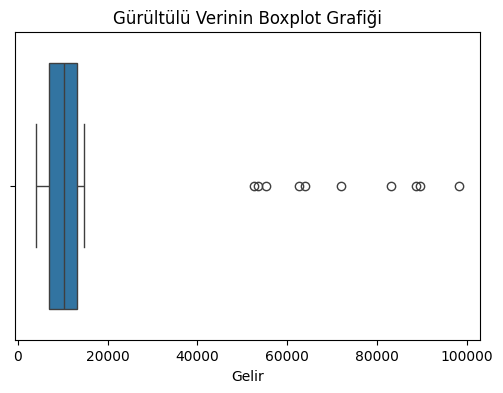

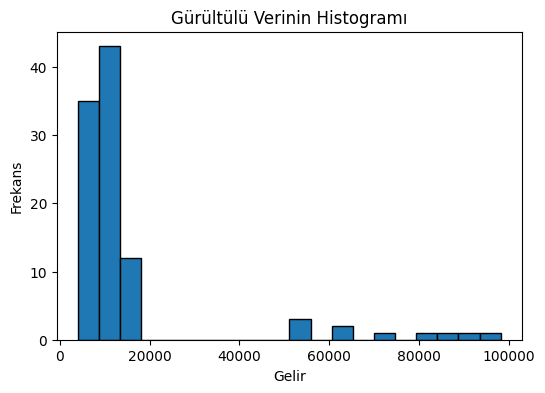

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Gelir'])
plt.title("Gürültülü Verinin Boxplot Grafiği")
plt.xlabel("Gelir")
plt.show()

# Histogram
plt.figure(figsize=(6, 4))
plt.hist(df['Gelir'], bins=20, edgecolor='black')
plt.title("Gürültülü Verinin Histogramı")
plt.xlabel("Gelir")
plt.ylabel("Frekans")
plt.show()


## 2. Gürültülü Veriyi Bölmeleme (Binning) ile Temizleme:

Bu adımda, bölmeleme (binning) yöntemi ile **veriyi eşit genişlikte gruplara ayırıyor** ve **her grup için ortalama hesaplayarak bu ortalamayı gruptaki tüm verilere uyguluyoruz**. Bu sayede aşırı uçlar düzeltiliyor.

In [ ]:
# Veriyi küçükten büyüğe sıralama
df_sorted = df.sort_values(by='Gelir')
df_sorted

,Gelir
95,4064
72,4161
6,4466
11,4769
57,4775
...,...
30,72002
50,83159
80,88660
40,89504


In [ ]:
# Eşit genişlikte bölmeleme yaparak veriyi gruplara ayırma (örneğin, 10'arlı gruplar)
bins = pd.cut(df_sorted['Gelir'], bins=10, labels=False)

bins

,Gelir
95,0
72,0
6,0
11,0
57,0
...,...
30,7
50,8
80,8
40,9


In [ ]:
# Her bin için ortalama değeri hesaplama
df_sorted['Gelir Düzeltilmiş'] = df_sorted.groupby(bins)['Gelir'].transform('mean')

# Gürültülü ve düzeltilmiş veriyi karşılaştırma
print("\nDüzeltilmiş Veri:")
df_sorted.head(100)


Düzeltilmiş Veri:


,Gelir,Gelir Düzeltilmiş
95,4064,8903.769231
72,4161,8903.769231
6,4466,8903.769231
11,4769,8903.769231
57,4775,8903.769231
...,...,...
30,72002,72002.000000
50,83159,85909.500000
80,88660,85909.500000
40,89504,93847.000000


In [ ]:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [ ]:
df_sorted

,Gelir,Gelir Düzeltilmiş
95,4064,8903.769231
72,4161,8903.769231
6,4466,8903.769231
11,4769,8903.769231
57,4775,8903.769231
...,...,...
30,72002,72002.000000
50,83159,85909.500000
80,88660,85909.500000
40,89504,93847.000000


In [ ]:
df_sorted.sort_index(inplace=True)
df_sorted

,Gelir,Gelir Düzeltilmiş
0,52695,53838.000000
1,4860,8903.769231
2,9390,8903.769231
3,9191,8903.769231
4,9734,8903.769231
...,...,...
95,4064,8903.769231
96,12006,8903.769231
97,6568,8903.769231
98,9463,8903.769231


## Kümeleme (Clustering) Yöntemiyle Gürültülü Veriyi Temizleme

## 1. Kütüphanelerin Yüklenmesi ve Rastgele verilerle gürültülü bir veri seti oluşturma

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [ ]:
np.random.seed(42)
gelir = np.random.randint(4000, 15000, size=100)  # 100 adet gelir verisi
gelir[::10] = np.random.randint(50000, 100000, size=10)  # Her 10. değeri aşırı uç (gürültülü) olarak ayarla

# Veri setini oluşturma
df = pd.DataFrame({
    'Gelir': gelir
})

df.head(10)

,Gelir
0,52695
1,4860
2,9390
3,9191
4,9734
5,10265
6,4466
7,8426
8,9578
9,12322


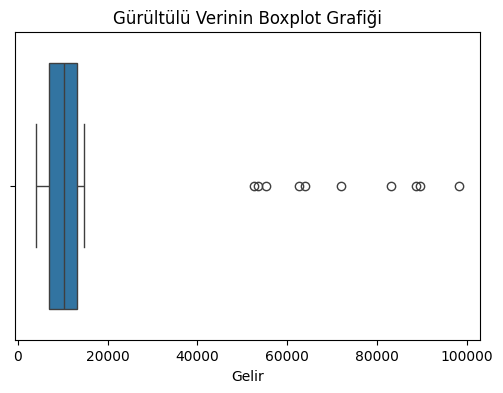

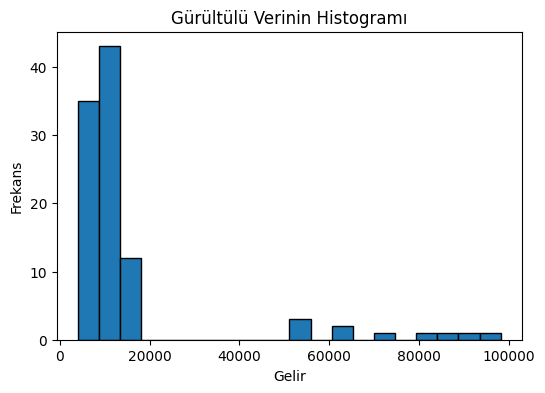

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Gelir'])
plt.title("Gürültülü Verinin Boxplot Grafiği")
plt.xlabel("Gelir")
plt.show()

# Histogram
plt.figure(figsize=(6, 4))
plt.hist(df['Gelir'], bins=20, edgecolor='black')
plt.title("Gürültülü Verinin Histogramı")
plt.xlabel("Gelir")
plt.ylabel("Frekans")
plt.show()


## 2. Kümeleme ile Gürültülü Verilerin Tespiti:

In [ ]:
# KMeans algoritması ile kümeleme yapma (2 küme ile başlıyoruz, çünkü aşırı uçları tespit etmek istiyoruz)
kmeans = KMeans(n_clusters=2, random_state=42)
df['Küme'] = kmeans.fit_predict(df[['Gelir']])

# Kümelenmiş veriyi gösterme
print("Kümelenmiş Veri:")
df

Kümelenmiş Veri:


,Gelir,Küme
0,52695,1
1,4860,0
2,9390,0
3,9191,0
4,9734,0
5,10265,0
6,4466,0
7,8426,0
8,9578,0
9,12322,0


## 3. Aykırı Değerlerin Belirlenmesi:

In [ ]:
# Her kümenin merkezini (centroid) bulma
centroids = kmeans.cluster_centers_

# Aykırı değerleri tespit etme (yüksek gelirli kümedeki verileri aykırı olarak kabul ediyoruz)
threshold = np.mean(centroids)  # Ortalama merkez değerini eşik olarak kabul ediyoruz
df['Aykırı'] = df['Gelir'] > threshold

# Aykırı değerleri gösterme
print("\nAykırı Değerler:")
df[df['Aykırı']]


Aykırı Değerler:


,Gelir,Küme,Aykırı
0,52695,1,True
10,98190,1,True
20,55258,1,True
30,72002,1,True
40,89504,1,True
50,83159,1,True
60,63986,1,True
70,62666,1,True
80,88660,1,True
90,53561,1,True


## 4. Aykırı Verilerin Temizlenmesi:

In [ ]:
# Aykırı olmayan verilerle yeni bir veri seti oluşturma
df_cleaned = df[~df['Aykırı']]

# Temizlenmiş veriyi gösterme
print("\nTemizlenmiş Veri:")
df_cleaned.head(10)


Temizlenmiş Veri:


,Gelir,Küme,Aykırı
1,4860,0,False
2,9390,0,False
3,9191,0,False
4,9734,0,False
5,10265,0,False
6,4466,0,False
7,8426,0,False
8,9578,0,False
9,12322,0,False
11,4769,0,False


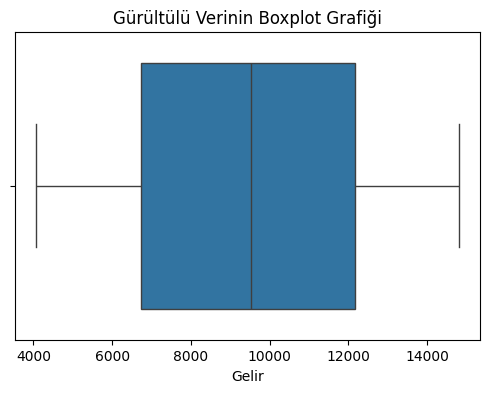

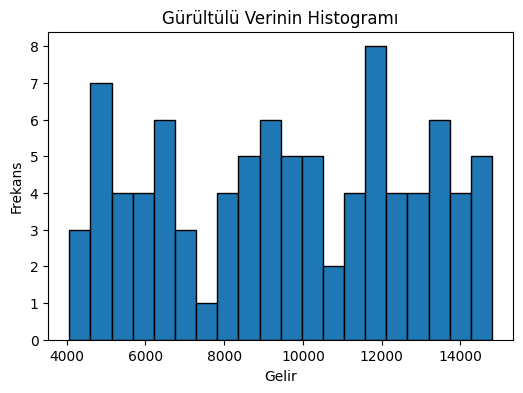

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_cleaned['Gelir'])
plt.title("Gürültülü Verinin Boxplot Grafiği")
plt.xlabel("Gelir")
plt.show()

# Histogram
plt.figure(figsize=(6, 4))
plt.hist(df_cleaned['Gelir'], bins=20, edgecolor='black')
plt.title("Gürültülü Verinin Histogramı")
plt.xlabel("Gelir")
plt.ylabel("Frekans")
plt.show()


## 3 Küme ile Kümeleme (Clustering) Uygulaması

## 1. Kütüphanelerin Yüklenmesi ve Veri Setinin Oluşturulması:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Rastgele verilerle gürültülü bir veri seti oluşturma
np.random.seed(42)
gelir = np.random.randint(4000, 15000, size=100)  # 100 adet gelir verisi
gelir[::10] = np.random.randint(50000, 100000, size=10)  # Her 10. değeri aşırı uç (gürültülü) olarak ayarla

# Veri setini oluşturma
df = pd.DataFrame({
    'Gelir': gelir
})
df.head(10)

,Gelir
0,52695
1,4860
2,9390
3,9191
4,9734
5,10265
6,4466
7,8426
8,9578
9,12322


## 2. 3 Küme ile Kümeleme Yapma:

In [ ]:
# KMeans algoritması ile kümeleme yapma (3 küme)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Küme'] = kmeans.fit_predict(df[['Gelir']])

# Kümelenmiş veriyi gösterme
print("Kümelenmiş Veri:")
df

Kümelenmiş Veri:


,Gelir,Küme
0,52695,2
1,4860,0
2,9390,0
3,9191,0
4,9734,0
5,10265,0
6,4466,0
7,8426,0
8,9578,0
9,12322,0


## 3. Kümelerin İncelenmesi:

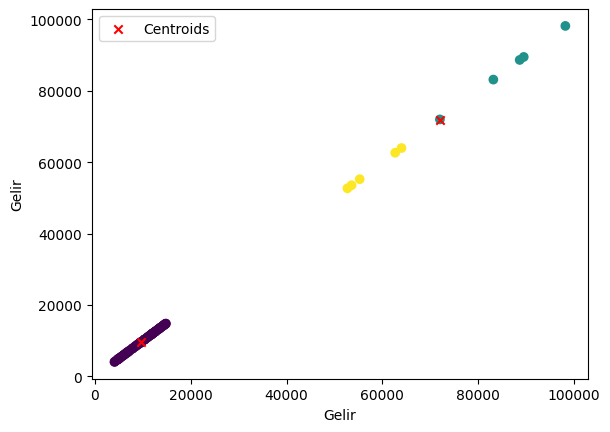

In [ ]:
plt.scatter(df['Gelir'], df['Gelir'], c=df['Küme'], cmap='viridis')
plt.scatter(centroids, centroids, c='red', marker='x', label='Centroids')
plt.xlabel('Gelir')
plt.ylabel('Gelir')
plt.legend()
plt.show()


### Plot'u Anlamak:
#### Veri Noktaları (Scatter Plot):
##### Farklı renklerle gösterilen noktalar, her kümedeki veri noktalarını temsil ediyor. Örneğin, koyu mor düşük gelirli kümeyi, sarı orta gelirli kümeyi ve yeşil de yüksek gelirli kümeyi temsil ediyor olabilir.
#### Küme Merkezleri (Centroids):
##### Kırmızı 'x' işaretleri, KMeans algoritması tarafından hesaplanan küme merkezlerini gösteriyor. Bu merkezler, her kümedeki ortalama gelir seviyesini temsil eder.

## 4. Aykırı Değerlerin Tespiti ve Temizlenmesi:

In [ ]:
# Aykırı değerleri tespit etme (en yüksek merkez değerine sahip kümeyi aykırı olarak kabul ediyoruz)
highest_centroid = centroids.max()  # En yüksek küme merkezini seçme
df['Aykırı'] = df['Gelir'] > highest_centroid  # Bu değerle tüm gelir verilerini karşılaştırıyoruz

# Aykırı değerleri gösterme
print("\nAykırı Değerler:")
print(df[df['Aykırı']])

# Aykırı olmayan verilerle yeni bir veri seti oluşturma
df_cleaned = df[~df['Aykırı']]

# Temizlenmiş veriyi gösterme
print("\nTemizlenmiş Veri:")
df_cleaned


Aykırı Değerler:
    Gelir  Küme  Aykırı
10  98190     1    True
30  72002     1    True
40  89504     1    True
50  83159     1    True
80  88660     1    True

Temizlenmiş Veri:


,Gelir,Küme,Aykırı
0,52695,2,False
1,4860,0,False
2,9390,0,False
3,9191,0,False
4,9734,0,False
5,10265,0,False
6,4466,0,False
7,8426,0,False
8,9578,0,False
9,12322,0,False


In [ ]:
highest_centroid

71968.1

### Açıklamalar:
#### 1. 3 kümeye ayırma: Veriyi 3 kümeye ayırarak düşük, orta ve yüksek gelir düzeylerini ayırıyoruz.
#### 2. Küme merkezleri: Her kümenin merkezlerini hesaplayarak hangi kümenin yüksek gelir (muhtemel aykırı değer) olduğunu belirliyoruz.
#### 3. Aykırı verilerin tespiti: En yüksek gelirli kümeyi aykırı değer olarak değerlendiriyoruz ve bu kümedeki verileri temizliyoruz.

# Eğri Uydurma (Curve Fitting) Uygulaması ile Gürültülü Veri Temizleme

## 1. Kütüphanelerin Yüklenmesi ve Veri Setinin Oluşturulması:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Rastgele gelir ve yaş verileri oluşturalım (gelir ile yaş arasında doğrusal bir ilişki varsayıyoruz)
np.random.seed(42)
yaş = np.random.randint(20, 60, size=100)
gelir = 1000 * yaş + np.random.randint(-5000, 50000, size=100)  # Yaşa bağlı gelir, üzerine biraz rastgele gürültü eklenmiş

# randint, "random integer" kelimelerinin kısaltmasıdır, yani rastgele tam sayı anlamına gelir.

df = pd.DataFrame({
    'Yaş': yaş,
    'Gelir': gelir
})

df.head(10)

,Yaş,Gelir
0,58,76599
1,48,78222
2,34,40837
3,27,36039
4,40,65818
5,58,72115
6,38,43965
7,42,61538
8,30,67530
9,30,30056


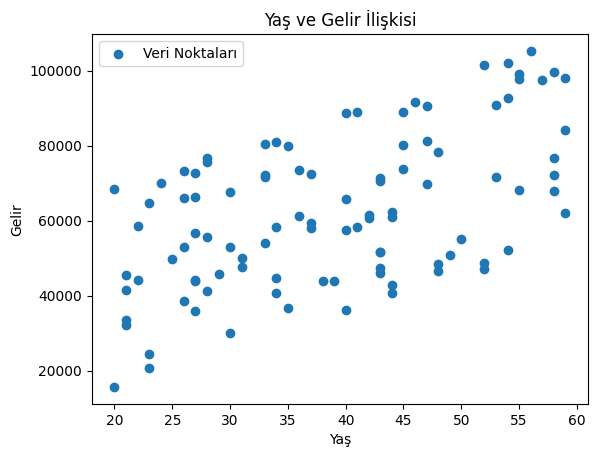

In [ ]:
# Veriyi görselleştirme
plt.scatter(df['Yaş'], df['Gelir'], label='Veri Noktaları')
plt.xlabel('Yaş')
plt.ylabel('Gelir')
plt.title('Yaş ve Gelir İlişkisi')
plt.legend()
plt.show()

## 2. Doğrusal Eğri Uydurma (Linear Regression):

Katsayı (Eğim): 958.3976819491412
Sabit: 25319.363917192815


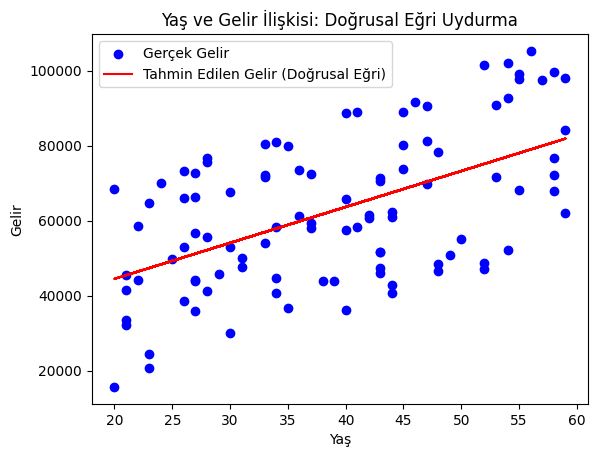

In [ ]:
# Linear Regression modeli
model = LinearRegression()

# Yaş ve Gelir arasındaki ilişkiye eğri uyduracağız
X = df[['Yaş']]  # Bağımsız değişken (yaş)
y = df['Gelir']  # Bağımlı değişken (gelir)

# Modeli eğitme
model.fit(X, y)

# Tahmin edilen (fitted) değerleri hesaplama
df['Tahmin Edilen Gelir'] = model.predict(X)

# Modelin katsayısı
print(f"Katsayı (Eğim): {model.coef_[0]}")  # ??????????????????
# yaş değişkeninin gelire olan etkisini gösterir.
# Yani, yaş değişkenindeki bir birimlik artışın, gelirde ne kadar bir değişime yol açtığını ifade eder.

# [0] regresyon modelinizin bağımsız değişkenlerine (features) karşılık gelen katsayıları içerir
# Eğer modelde birden fazla bağımsız değişken (özellik) olsaydı, model.coef_ birden fazla değer içerecekti.

# Modelin sabiti
print(f"Sabit: {model.intercept_}")
# bu değer, bağımsız değişken (yaş) sıfır olduğunda bağımlı değişkenin (gelir) alacağı tahmin edilen değeri gösterir.


# Gelir=(Katsayı)×Yaş + Sabit

# Gerçek ve tahmin edilen gelirleri karşılaştırmalı olarak gösterme
plt.scatter(df['Yaş'], df['Gelir'], label='Gerçek Gelir', color='blue')
plt.plot(df['Yaş'], df['Tahmin Edilen Gelir'], label='Tahmin Edilen Gelir (Doğrusal Eğri)', color='red')
plt.xlabel('Yaş')
plt.ylabel('Gelir')
plt.legend()
plt.title('Yaş ve Gelir İlişkisi: Doğrusal Eğri Uydurma')
plt.show()

### Açıklamalar:
#### 1. Veri Seti Oluşturma: İlk adımda yaş ile gelir arasında rastgele bir ilişki kuruyoruz. Gelir, yaşla doğru orantılı olacak şekilde ayarlanmış ve üzerine biraz gürültü eklenmiştir.
#### 2. Linear Regression Modeli: LinearRegression modelini kullanarak yaş ve gelir arasındaki doğrusal ilişkiye bir doğrusal eğri uyduruyoruz.
#### 3. Eğriyi Görselleştirme: Gerçek veri noktaları ile model tarafından tahmin edilen (fitted) doğrusal eğriyi karşılaştırarak görselleştiriyoruz.
#### 4. Katsayı ve Sabit: Modelin eğimi (katsayı) ve sabiti (intercept) bize yaş ile gelir arasındaki doğrusal ilişkinin kuvvetini ve başlangıç noktasını gösterir.

Aykırı Değerler:
    Yaş   Gelir  Tahmin Edilen Gelir          Hata
2    34   40837         57904.885103 -17067.885103
3    27   36039         51196.101330 -15157.101330
6    38   43965         61738.475831 -17773.475831
8    30   67530         54071.294376  13458.705624
9    30   30056         54071.294376 -24015.294376
11   55   97716         78031.236424  19684.763576
12   59   62110         81864.827152 -19754.827152
13   43   51773         66530.464241 -14757.464241
15   41   88992         64613.668877  24378.331123
16   21   33412         45445.715238 -12033.715238
18   49   50910         72280.850333 -21370.850333
19   57   97453         79948.031788  17504.968212
21   40   88640         63655.271195  24984.728805
22   52   47206         75156.043379 -27950.043379
26   46   91636         69405.657287  22230.342713
27   47   90702         70364.054969  20337.945031
28   35   80015         58863.282785  21151.717215
29   34   80942         57904.885103  23037.114897
30   22   5852

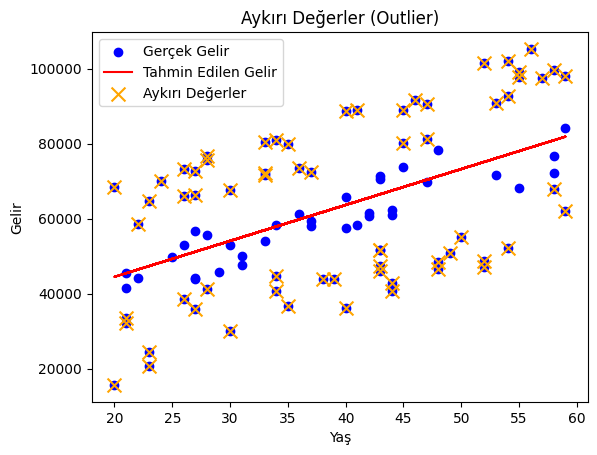

In [ ]:
# Hataları hesaplayalım (Gerçek gelir - Tahmin edilen gelir)
df['Hata'] = df['Gelir'] - df['Tahmin Edilen Gelir']

# Hataların mutlak değerini alarak aykırı değerlere bakalım
# Aykırı değerleri belirlemek için belirli bir eşik değeri (örneğin 10,000) seçelim
aykiri_degerler = df[np.abs(df['Hata']) > 10000]

# Aykırı değerleri yazdıralım
print("Aykırı Değerler:")
print(aykiri_degerler)

# Aykırı değerleri görselleştirme
plt.scatter(df['Yaş'], df['Gelir'], label='Gerçek Gelir', color='blue')
plt.plot(df['Yaş'], df['Tahmin Edilen Gelir'], label='Tahmin Edilen Gelir', color='red')
plt.scatter(aykiri_degerler['Yaş'], aykiri_degerler['Gelir'], label='Aykırı Değerler', color='orange', marker='x', s=100)
plt.xlabel('Yaş')
plt.ylabel('Gelir')
plt.legend()
plt.title('Aykırı Değerler (Outlier)')
plt.show()


## Aykırı değerleri daha teknik bir yaklaşımla tespit etmek için istatistiksel yöntemler kullanabilirsiniz.

## 1. Z-Score Yöntemi:
### Z-Score, bir verinin ortalamadan kaç standart sapma uzakta olduğunu gösterir.
### Genellikle Z-Score'u 3'ten büyük olan değerler aykırı değer olarak kabul edilir (bu eşik, durumunuza göre ayarlanabilir).

In [ ]:
from scipy import stats

# Z-Score hesaplayalım
df['Z-Score'] = np.abs(stats.zscore(df['Hata']))

# Z-Score'u 3'ten büyük olan değerleri aykırı kabul edelim
aykiri_degerler = df[df['Z-Score'] > 3]

# Aykırı değerleri görelim
print(aykiri_degerler)

Empty DataFrame
Columns: [Yaş, Gelir, Tahmin Edilen Gelir, Hata, Z-Score]
Index: []


###  Z-Score Hesaplamasını Görselleştirme

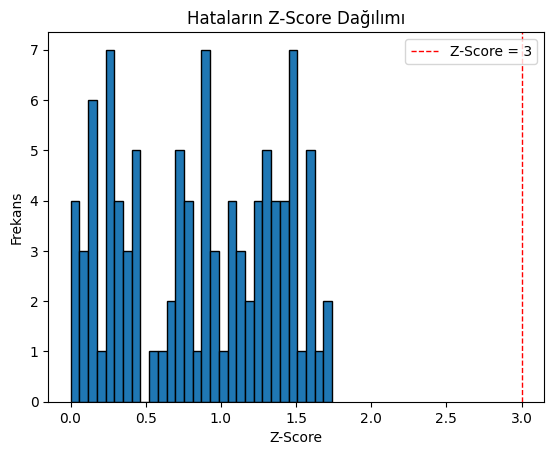

Z-Score'u 3'ten büyük olan aykırı değerler:
Empty DataFrame
Columns: [Yaş, Gelir, Tahmin Edilen Gelir, Hata, Z-Score]
Index: []

Z-Score'u 2.5'ten büyük olan aykırı değerler:
Empty DataFrame
Columns: [Yaş, Gelir, Tahmin Edilen Gelir, Hata, Z-Score]
Index: []


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Z-Score hesaplayalım
df['Z-Score'] = np.abs(stats.zscore(df['Hata']))

# Z-Score histogramını çizdir
plt.hist(df['Z-Score'], bins=30, edgecolor='k')
plt.axvline(3, color='red', linestyle='dashed', linewidth=1, label='Z-Score = 3')
plt.xlabel('Z-Score')
plt.ylabel('Frekans')
plt.title('Hataların Z-Score Dağılımı')
plt.legend()
plt.show()

# Z-Score'u 3'ten büyük olan değerleri aykırı kabul edelim
aykiri_degerler = df[df['Z-Score'] > 3]

# Aykırı değerleri görelim
print("Z-Score'u 3'ten büyük olan aykırı değerler:")
print(aykiri_degerler)

# Eğer aykırı değer bulunmuyorsa, Z-Score eşiğini düşürelim (örneğin 2.5)
if aykiri_degerler.empty:
    aykiri_degerler = df[df['Z-Score'] > 2.5]
    print("\nZ-Score'u 2.5'ten büyük olan aykırı değerler:")
    print(aykiri_degerler)


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Örnek veri seti
sayılar = [5, 7, 10, 12, 15, 20, 1000, 7, 8, 9]
sayılar_df = pd.DataFrame({'Sayılar': sayılar})

# Z-Score hesapla: Her değerin ortalamadan kaç standart sapma uzakta olduğunu.
sayılar_df['Z-Score'] = np.abs(stats.zscore(sayılar_df['Sayılar']))
# Z-Score = (Veri Noktası - Ortalama) / Standart Sapma

# Z-Score'u 3'ten büyük olan değerleri aykırı kabul et
aykiri_degerler = sayılar_df[sayılar_df['Z-Score'] > 3]

# Sonuçları göster
print("Z-Score ile tespit edilen aykırı değerler:")
print(aykiri_degerler)


Z-Score ile tespit edilen aykırı değerler:
Empty DataFrame
Columns: [Sayılar, Z-Score]
Index: []


### Z-Score Yöntemi ile Aykırı Değerleri Bulma - Manuel Örnek

Veri kümesi: **5, 7, 10, 12, 15, 20, 1000, 7, 8, 9**

#### 1. Adım: Verilerin Ortalamasını ve Standart Sapmasını Hesapla
Öncelikle, Z-Score hesaplamak için veri setinin ortalamasını ve standart sapmasını bulmamız gerekiyor.

Veri kümesi: **5, 7, 10, 12, 15, 20, 1000, 7, 8, 9**

- Ortalama (Mean) hesaplaması:
  
  Ortalama = (5 + 7 + 10 + 12 + 15 + 20 + 1000 + 7 + 8 + 9) / 10  
  Ortalama = 1093 / 10 = 109.3

- Standart sapma (Standard Deviation) hesaplaması:

  Standart Sapma =  
  √[((5-109.3)² + (7-109.3)² + (10-109.3)² + ... + (9-109.3)²) / 10]  
  
  Hesaplamalar sonucunda Standart Sapma ≈ 313.43

#### 2. Adım: Z-Score Hesapla
Z-Score, her bir veri noktasının ortalamadan kaç standart sapma uzakta olduğunu gösterir. Formül şu şekildedir:

Z-Score = (Veri Noktası - Ortalama) / Standart Sapma

Bu formülü kullanarak her bir değer için Z-Score hesaplayalım:

- Z(5) = (5 - 109.3) / 313.43 ≈ -0.332
- Z(7) = (7 - 109.3) / 313.43 ≈ -0.326
- Z(10) = (10 - 109.3) / 313.43 ≈ -0.317
- Z(12) = (12 - 109.3) / 313.43 ≈ -0.310
- Z(15) = (15 - 109.3) / 313.43 ≈ -0.301
- Z(20) = (20 - 109.3) / 313.43 ≈ -0.285
- Z(1000) = (1000 - 109.3) / 313.43 ≈ 2.839
- Z(7) = (7 - 109.3) / 313.43 ≈ -0.326
- Z(8) = (8 - 109.3) / 313.43 ≈ -0.323
- Z(9) = (9 - 109.3) / 313.43 ≈ -0.320

#### 3. Adım: Aykırı Değerleri Belirle
Genellikle, Z-Score değeri **3'ten büyük** olan veriler aykırı değer olarak kabul edilir (yani verinin ortalamadan en az 3 standart sapma uzakta olması).

Bu durumda, hesaplanan Z-Score'lar arasında 3'ten büyük olan tek değer yok. Ancak, eğer veri setinde aykırı bir değer bulunsa, o değer 3'ten büyük Z-Score'a sahip olacaktı.


## 2. IQR (Interquartile Range) Yöntemi:
### IQR, verilerin ortasındaki yüzde 50'lik bölümünü temsil eder ve aykırı değerleri tespit etmek için alt ve üst sınırları belirler.
### Aykırı değerler, Q1 (1. çeyrek) ile Q3 (3. çeyrek) arasında kalan aralığın 1.5 katından daha fazla dışına çıkan verilerdir.

In [ ]:
# 1. ve 3. çeyreklikleri hesaplayalım
Q1 = df['Hata'].quantile(0.25)
Q3 = df['Hata'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerler: IQR'nin 1.5 katı dışındaki değerler
aykiri_degerler = df[(df['Hata'] < (Q1 - 1.5 * IQR)) | (df['Hata'] > (Q3 + 1.5 * IQR))]

# Aykırı değerleri görelim
print(aykiri_degerler)

Empty DataFrame
Columns: [Yaş, Gelir, Tahmin Edilen Gelir, Hata, Z-Score]
Index: []


In [ ]:
import numpy as np
import pandas as pd

veri = [ 5, 10, 15, 20, 25, 30, 35, 100, 45, 50]
veri_df = pd.DataFrame({'Değerler': veri})

# Q1, Q3 ve IQR hesapla
Q1 = veri_df['Değerler'].quantile(0.25)
Q3 = veri_df['Değerler'].quantile(0.75)
IQR = Q3 - Q1

# Alt ve üst sınırları belirle
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

# Aykırı değerleri bul
aykiri_degerler = veri_df[(veri_df['Değerler'] < alt_sinir) | (veri_df['Değerler'] > ust_sinir)]
print("Aykırı Değerler:")
print(aykiri_degerler)


Aykırı Değerler:
   Değerler
7       100


In [ ]:
Q1

np.float64(-13210.342637128908)

In [ ]:
Q3

np.float64(15364.674748252533)

**Sıralı hali:** [5, 10, 15, 20, 25, 30, 35, 45, 50, 100]

**1. Q1 ve Q3'ü Hesapla:** Verinin 1. çeyreklik (Q1) ve 3. çeyreklik (Q3) değerlerini bulun.

**2. IQR'yi Hesapla:** IQR = Q3 - Q1.

**3. Eşik Değerleri Belirle:**       **Alt Sınır** = Q1 - 1.5 × IQR,          **Üst Sınır** = Q3 + 1.5 × IQR.

**4. Aykırı Değerleri Tespit Et:** Eşik sınırlarının dışında kalan değerleri aykırı kabul edin.

### IQR (Interquartile Range) Yöntemi ile Aykırı Değerleri Bulma - Manuel Örnek

Verilen veri kümesi:

5, 10, 15, 20, 25, 30, 35, 100, 45, 50

#### 1. Adım: Veriyi Sıralama

Veriyi küçükten büyüğe doğru sıralayalım:

5, 10, 15, 20, 25, 30, 35, 45, 50, 100

#### 2. Adım: Q1 ve Q3 Değerlerini Hesaplama

Veri kümesinde toplam 10 değer olduğu için, Q1 ve Q3’ü hesaplayabiliriz.

- **Q1 (İlk Çeyrek) Hesaplama**  
  Q1, veri setinin ilk %25'lik diliminin medyanıdır. Q1 pozisyonunu bulmak için formülü kullanırız:

  Q1 = (n+1) / 4

  Burada n = 10 olduğu için, Q1 pozisyonu:

  Q1 = (10+1) / 4 = 2.75

  Q1, 2.75. pozisyondadır. Tam sayı olmadığından, 2. ve 3. değerlerin ortalamasını alırız:

  Q1 = (10 + 15) / 2 = 12.5

  **Q1 = 12.5**

- **Q3 (Üçüncü Çeyrek) Hesaplama**  
  Q3, veri setinin %75'lik diliminin medyanıdır. Q3 pozisyonu ise şöyle bulunur:

  Q3 = 3(n+1) / 4

  Burada n = 10 olduğundan, Q3 pozisyonu:

  Q3 = 3 * (10+1) / 4 = 8.25

  Q3, 8.25. pozisyondadır. Tam sayı olmadığından, 8. ve 9. değerlerin ortalamasını alırız:

  Q3 = (45 + 50) / 2 = 47.5

  **Q3 = 47.5**

#### 3. Adım: IQR Hesaplama

IQR’yi (Q3 - Q1) formülü ile hesaplayalım:

IQR = Q3 - Q1 = 47.5 - 12.5 = 35

#### 4. Adım: Aykırı Değer Sınırlarını Belirleme

Aykırı değer sınırlarını bulmak için:

- Alt sınır: Q1 - 1.5 × IQR = 12.5 - 1.5 × 35 = -40
- Üst sınır: Q3 + 1.5 × IQR = 47.5 + 1.5 × 35 = 100

#### 5. Adım: Aykırı Değerleri Belirleme

Bu sınırların dışında kalan değerler aykırı kabul edilir. Veri kümesinde:

- -40'tan düşük değer yok.
- 100 değeri, 90’dan büyük olduğu için aykırı bir değerdir.

#### Sonuç

Bu veri kümesinde, IQR yöntemi ile aykırı değer olarak **100** bulunmuştur.


## NOT:

**Pandas ve Numpy, çeyrekleri (Q1 ve Q3) hesaplamak için varsayılan olarak lineer interpolasyon kullanır. Bu yöntem, çeyrek noktalarını veriler arasında ağırlıklı bir ortalama alarak hesaplar. Bu nedenle, elle yapılan hesaplamalardan farklı olarak Q1 ve Q3 değerleri 16.25 ve 42.5 gibi sonuçlar veriyor.**

## 3. MAD (Median Absolute Deviation) (Medyan Mutlak Sapma) Yöntemi:
### Median Absolute Deviation (MAD), verilerin merkezi eğilimini ve yayılımını ölçer.
### Bu yöntemde, verilerin medyanına göre mutlak sapmalar hesaplanır ve bu sapmaların ortalaması alınır. Aykırı değerler, genellikle MAD'nin belirli bir katı kadar uzakta olan veriler olarak kabul edilir.

In [ ]:
# Medyanı ve mutlak sapmayı hesaplayalım
medyan = np.median(df['Hata'])
mad = np.median(np.abs(df['Hata'] - medyan))

# Aykırı değerler: MAD'nin 3 katı dışındaki değerler
aykiri_degerler = df[np.abs(df['Hata'] - medyan) > 3 * mad]

# Aykırı değerleri görelim
print(aykiri_degerler)

Empty DataFrame
Columns: [Yaş, Gelir, Tahmin Edilen Gelir, Hata, Z-Score]
Index: []


In [ ]:
import numpy as np
import pandas as pd

sayılar = [5, 7, 10, 12, 15, 20, 100, 7, 8, 9]
df = pd.DataFrame({'Sayılar': sayılar})

# Medyanı ve MAD'yi hesapla
medyan = np.median(df['Sayılar'])
mad = np.median(np.abs(df['Sayılar'] - medyan))

# Aykırı değerleri bul
aykiri_degerler = df[np.abs(df['Sayılar'] - medyan) > 3 * mad]
print("MAD ile tespit edilen aykırı değerler:")
print(aykiri_degerler)


MAD ile tespit edilen aykırı değerler:
   Sayılar
5       20
6      100


**1. Medyanı Hesapla:** Veri setinin ortanca değerini bulun

**2. Mutlak Sapmaları Hesapla:** Her verinin medyandan mutlak sapmasını hesaplayın.

**3. MAD'yi Hesapla:** Bu mutlak sapmaların medyanını bulun (bu, MAD'dir).

**4. Eşik Değerini Belirle:** Eşik = Medyan ± (3 × MAD)

**5. Aykırı Değerleri Tespit Et:** Eşik sınırlarının dışında kalan değerleri aykırı kabul edin.

### MAD (Median Absolute Deviation) Yöntemi ile Aykırı Değerleri Bulma - Manuel Örnek

Veri kümesi: **5, 7, 10, 12, 15, 20, 100, 7, 8, 9**

#### 1. Adım: Verilerin Medyanını Bul
Verilerin medyanını hesaplamak için önce veri setini küçükten büyüğe sıralayalım:
**5, 7, 7, 8, 9, 10, 12, 15, 20, 100**

- Toplam veri sayısı 10 olduğundan, medyan (ortanca değer), 5. ve 6. pozisyondaki sayıların ortalamasıdır.
- 5. pozisyondaki sayı: 9, 6. pozisyondaki sayı: 10
- Medyan = (9 + 10) / 2 = 9.5

#### 2. Adım: Medyandan Mutlak Sapmaları Hesapla
Her bir verinin medyandan mutlak sapmasını hesaplayalım:

- |5 - 9.5| = 4.5
- |7 - 9.5| = 2.5
- |7 - 9.5| = 2.5
- |8 - 9.5| = 1.5
- |9 - 9.5| = 0.5
- |10 - 9.5| = 0.5
- |12 - 9.5| = 2.5
- |15 - 9.5| = 5.5
- |20 - 9.5| = 10.5
- |100 - 9.5| = 90.5

#### 3. Adım: MAD'yi (Medyan Mutlak Sapma) Hesapla
Bu sapmaların medyanını alarak MAD'yi bulalım:

- Sapmalar: **0.5, 0.5, 1.5, 2.5, 2.5, 2.5, 4.5, 5.5, 10.5, 90.5**
- Bu sapmaların medyanı (ortanca değeri): 2.5
- MAD = 2.5

#### 4. Adım: Aykırı Değerleri Belirle
Aykırı değerleri belirlemek için, verilerin medyandan farklarının 3 × MAD'den büyük olup olmadığını kontrol edelim:
- 3 × MAD = 3 × 2.5 = 7.5

Veri setindeki her bir değerin medyandan farkını hesaplayıp 7.5 ile karşılaştıralım:
- |5 - 9.5| = 4.5 → Aykırı değil
- |7 - 9.5| = 2.5 → Aykırı değil
- |7 - 9.5| = 2.5 → Aykırı değil
- |8 - 9.5| = 1.5 → Aykırı değil
- |9 - 9.5| = 0.5 → Aykırı değil
- |10 - 9.5| = 0.5 → Aykırı değil
- |12 - 9.5| = 2.5 → Aykırı değil
- |15 - 9.5| = 5.5 → Aykırı değil
- |20 - 9.5| = 10.5 → **Aykırı (10.5 > 7.5)**
- |100 - 9.5| = 90.5 → **Aykırı (90.5 > 7.5)**

#### 5. Adım: Aykırı Değerleri Belirle
- 20 ve 100 değerleri medyandan farkları 7.5'i aştığı için aykırı değerlerdir.
- **MAD ile tespit edilen aykırı değerler: 20 ve 100**


# Nitelik Oluşturma (Feature Engineering)

## 1. Örnek Veri Seti Oluşturma:

In [ ]:
import pandas as pd
import numpy as np

# Örnek bir veri seti oluşturalım
np.random.seed(42)
boy = np.random.randint(100, 200, size=100)  # Boy (cm)
en = np.random.randint(50, 100, size=100)    # En (cm)

df = pd.DataFrame({
    'Boy': boy,
    'En': en
})

df.head()

,Boy,En
0,151,75
1,192,74
2,114,94
3,171,90
4,160,78


## 2. Nitelik Oluşturma - Alan Hesaplama:

In [ ]:
# Yeni bir nitelik (özellik) oluşturma: Alan = Boy * En
df['Alan'] = df['Boy'] * df['En']

df.head()

,Boy,En,Alan
0,151,75,11325
1,192,74,14208
2,114,94,10716
3,171,90,15390
4,160,78,12480


## 3. Kategorik Nitelik Oluşturma:

#### Bazen sayısal verilerden kategorik nitelikler türetebiliriz. Örneğin, boy verilerini kısa, orta ve uzun olarak sınıflandırabiliriz.

In [ ]:
# Boy verisini kategorik hale getirme (Kısa, Orta, Uzun)
df['Boy Kategori'] = pd.cut(df['Boy'], bins=[100, 150, 175, 200], labels=['Kısa', 'Orta', 'Uzun'])

df.head()

,Boy,En,Alan,Boy Kategori
0,151,75,11325,Orta
1,192,74,14208,Uzun
2,114,94,10716,Kısa
3,171,90,15390,Orta
4,160,78,12480,Orta
